# Problem DS9: 

Dataset link : https://www.kaggle.com/uciml/iris

DS9 : Consider the dataset named iris (link given below) which consists of data of different
species and their attributes. Perform the following operations to the dataset:

a. Import the data set

b. Store the split data into separate variables.

c. Create a naive Bayes model on the training dataset

d. Now predict the data model for a testing dataset that you have separated

# Step 1: Import Libraries. 

In [1]:
#import libraries for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Import the Dataset.

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Step 3: Encoding categorical data.

In [6]:
print('Categorical Columns are ','\n',list(df.select_dtypes(include='object')),'\n')
print('Numerical Columns are ','\n',list(df.select_dtypes(exclude='object')))

Categorical Columns are  
 ['Species'] 

Numerical Columns are  
 ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Convert target column to 0 and 1
df["Species"] = df["Species"].map({"Iris-setosa": 1, "Iris-versicolor":2, "Iris-virginica":3})

In [9]:
df['Species']

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

# View Dataset

In [10]:
df.Species.value_counts(normalize=True).round(3)

3    0.333
2    0.333
1    0.333
Name: Species, dtype: float64

In [11]:
df.shape

(150, 6)

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [13]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3
149,150,5.9,3.0,5.1,1.8,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


# EDA/DATA VISUALISATION

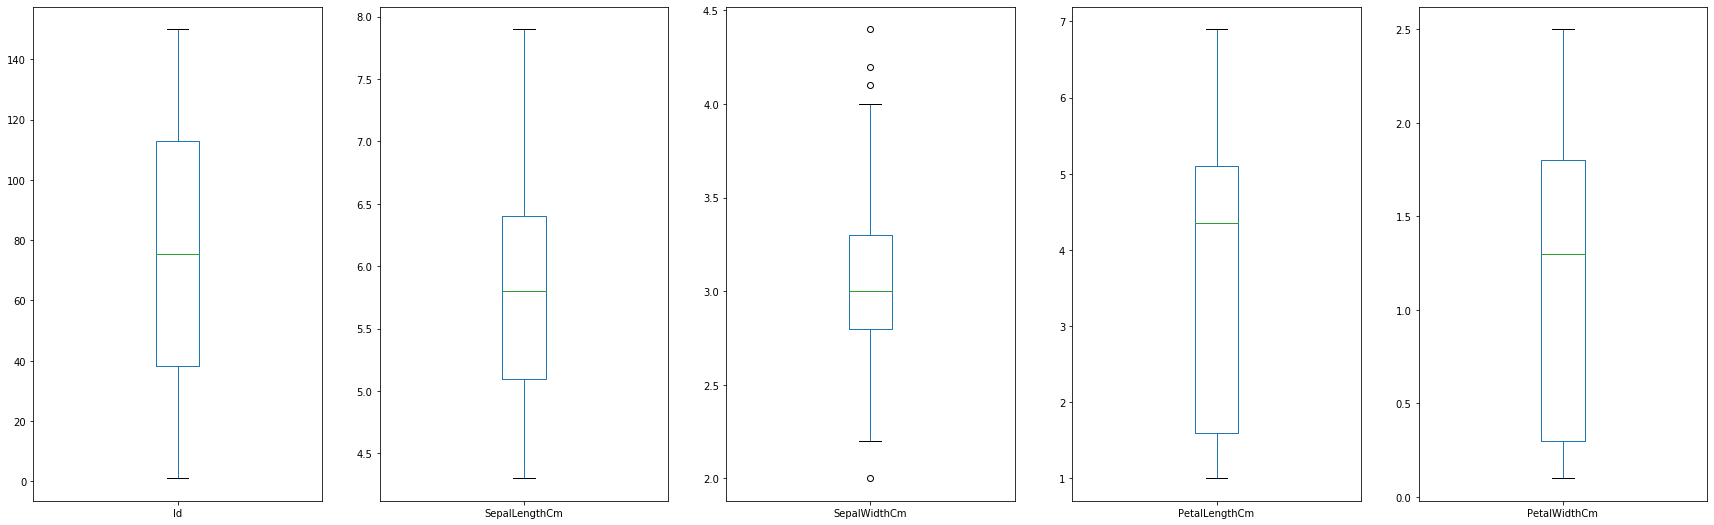

In [16]:
df.drop('Species',axis=1).plot(kind='box',layout=(2,5),subplots=True,figsize=(30,20))
plt.show()

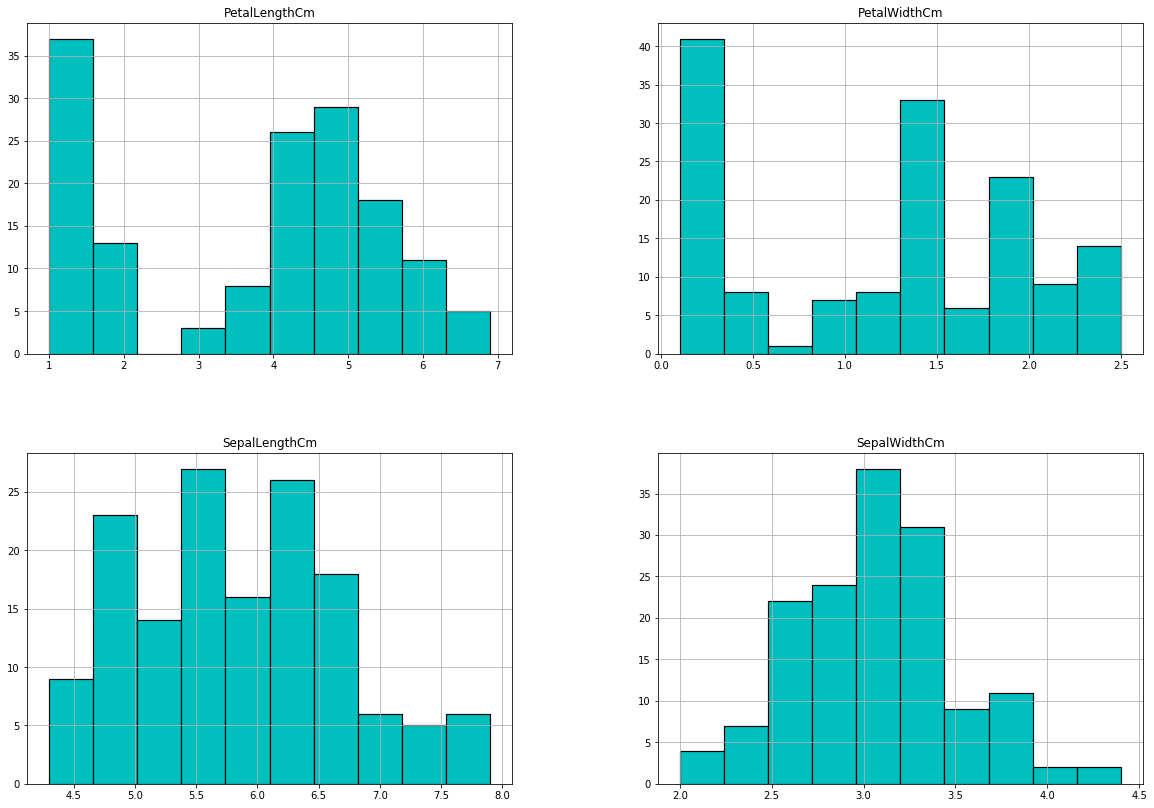

In [17]:
# Distribution of Different Features of the Dataset
d1=df.drop(['Species','Id'], axis=1)
distribution = d1.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.show()

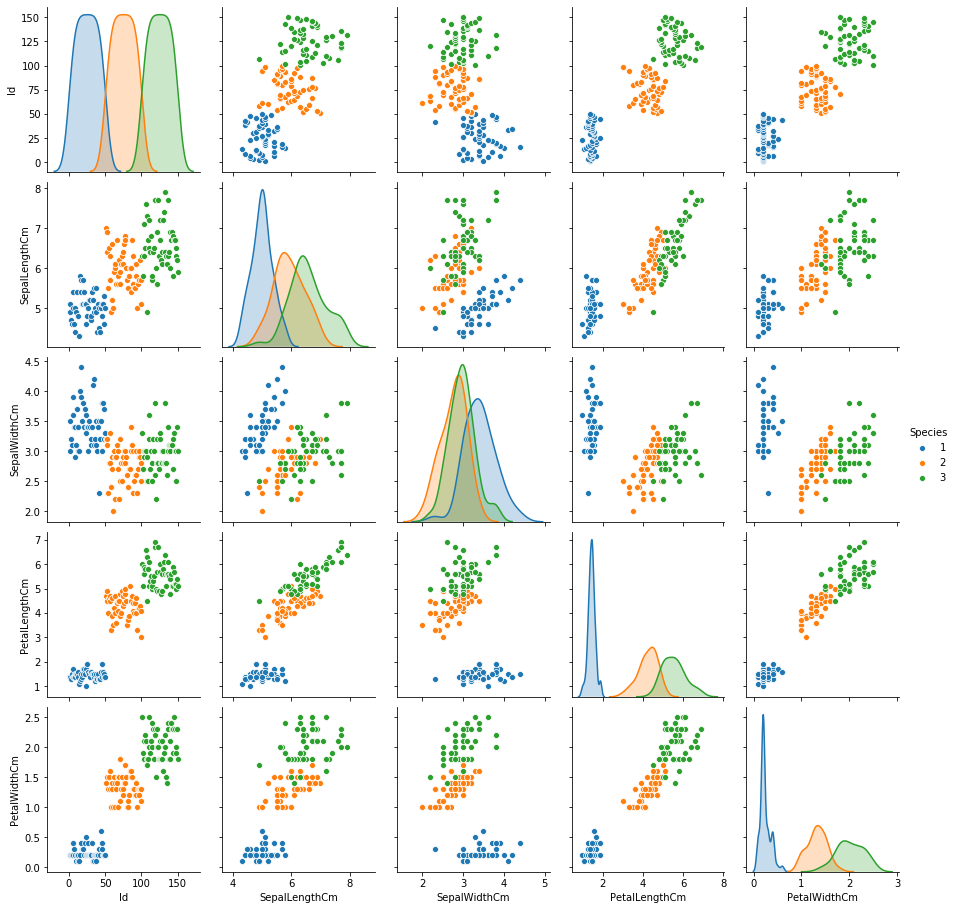

In [18]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Species')

Text(0.5, 1.05, 'Correlation of Iris Dataset')

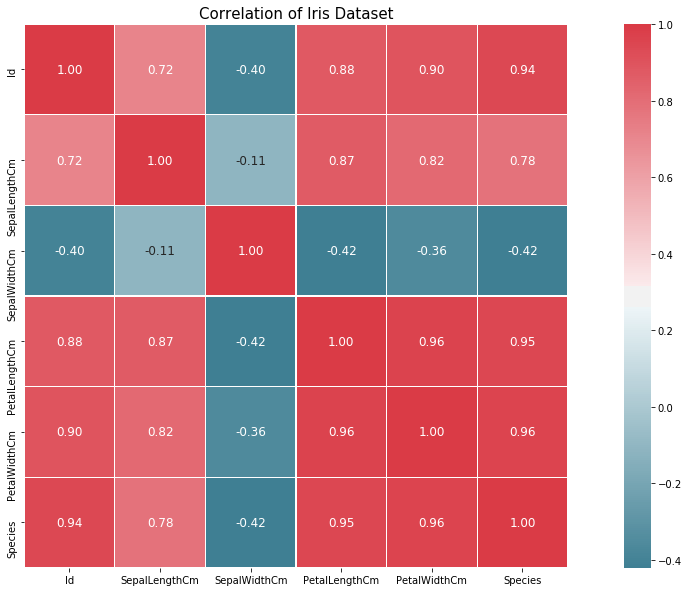

In [19]:
corr = df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(20,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Iris Dataset', y=1.05, size=15) 

# Features Selection

In [20]:
#Spliting the dataset in independent and dependent variables
x = df.iloc[:,:4].values
y = df['Species'].values

# Split dataset

In [21]:
#Splitting Datset into Training and Testing Set in 75:25
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 62)

# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Classification Analysis

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
# creating object of Naive Bayes c
gnb = GaussianNB()

In [26]:
# fitting the model/ training the model on training data (x_train,y_train)
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
#predicting results on test set
y_pred_gnb = gnb.predict(x_test)

In [28]:
# evaluating model performance by confusion-matrix
cm = confusion_matrix(y_test,y_pred_gnb)
print(cm)

[[14  0  0]
 [ 0 11  0]
 [ 0  1 12]]


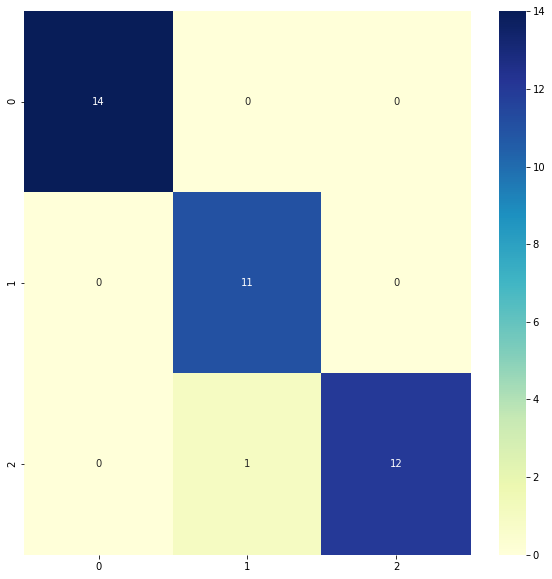

In [29]:
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")

In [30]:
# Performance Measures of Naive Bayes model
accuracy_score(y_test, y_pred_gnb)

0.9736842105263158

In [31]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum())*100, '%')

Correct predictions:  37
False predictions 1


Accuracy of the Naive Bayes Clasification is:  97.36842105263158 %
